In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [48]:
#For reference:
#sl_no	Serial Number
#gender	Gender (M/F)
#ssc_p	Secondary Education percentile
#ssc_b	Board of Education
#hsc_p	Higher Secondary Education percentile
#hsc_b	Board of Education- Central/ Others
#hsc_s	Specialization in Higher Secondary Education
#degree_p	Degree Percentile
#degree_t	Under Graduation(Degree type)
#workex	Work Experience
#etest_p	Employability test percentile
#specialisation	Area of speciality 
#mba_p	MBA percentile
#Salary	Salary of job offered
#status	placed or nor placed (target variable)


In [49]:
###
#            Question 1: Adjusting for NULL values
###

In [50]:
df=pd.read_csv("Placement.csv")

#Overview of null values
null=df.isnull().any(axis=1)
print(df[null])

#Null values per column
for col in df.columns:
    count=df[col].isna().sum()
    print(col,':',count)

     sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
3        4      M   56.0  Central   52.0  Central   Science     52.00   
5        6      M   55.0   Others   49.8   Others   Science     67.25   
6        7      F   46.0   Others   49.2   Others  Commerce     79.00   
9       10      M   58.0  Central   70.0  Central  Commerce     61.00   
11      12      M   69.6  Central   68.4  Central  Commerce     78.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
198    199      F   67.0  Central   70.0  Central  Commerce     65.00   
201    202      M   54.2  Central   63.0   Others   Science     58.00   
206    207      M   41.0  Central   42.0  Central   Science     60.00   
208    209      F   43.0  Central   60.0   Others   Science     65.00   
214    215      M   62.0  Central   58.0   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p    salary      status  
3     Sci&Tech     No    66.00         Mkt&HR 

In [51]:
#Lets start with the greatest number of nulls, the salary tab
#I believe that the nulls are correlated with not being placed at a job,
#lets test my theory

df.loc[(df["salary"].isnull()) & (df['status']=='Placed')]


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status


In [52]:
#Since all of the null salaries are correlated to no placement, I believe
#we assign 0 to these values, no job is directly correlated with no salary

df.loc[df["status"]=='Not Placed','salary']=0

#check to confirm update
df.loc[df["status"]=='Not Placed']

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,0.0,Not Placed
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,0.0,Not Placed
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,0.0,Not Placed
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,0.0,Not Placed
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,0.0,Not Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,0.0,Not Placed
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,0.0,Not Placed
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,0.0,Not Placed
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,0.0,Not Placed


In [53]:
#To account for hsc_p nulls, I will take a median of the other values in the
#column and set those as a replacement, so as to not skew the data too much

#Find median
df.median()

#replace with median
df.loc[df["hsc_p"].isnull(),'hsc_p']=65
df

C:\Users\Eric\AppData\Local\Temp\ipykernel_42572\4173726600.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0.0,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0,Placed


In [54]:
# Because of the small amount of categorical null values in hsc_s and specialization, I have opted to 
# drop the rows
df=df.dropna(subset=['hsc_s'])
df=df.dropna(subset=['specialisation'])

In [55]:
df.to_csv('Updated_Placement.csv')

In [56]:
###
#            Question 2: Adjusting for Outliers
###


In [57]:
# Find the interquartile range
q1=df.quantile(.25)
q3=df.quantile(.75)
print(q1,'\n',q3,'\n')

iqr=q3-q1
print(iqr)

## The first thing I noticed here is the fact that the salary column's lower 
## quartile is 0, this is not entirely accurate as these 0's are categorized
## by no job placement, meaning it would skew our data and actually lead to a
## negative lower range. I believe the proper way to address this is to filter
## this category for non-zero values, and find the interquartile range for that
## range of values.(IQR from these findings will only be applied to the salary column)

## We also need to exclude sl_no as these are serial numbers and have no correlation
## in the data

sl_no       56.00
ssc_p       60.80
hsc_p       61.00
degree_p    61.00
etest_p     60.00
mba_p       57.99
salary       0.00
Name: 0.25, dtype: float64 
 sl_no          162.00
ssc_p           76.00
hsc_p           73.00
degree_p        72.00
etest_p         84.00
mba_p           66.28
salary      285000.00
Name: 0.75, dtype: float64 

sl_no          106.00
ssc_p           15.20
hsc_p           12.00
degree_p        11.00
etest_p         24.00
mba_p            8.29
salary      285000.00
dtype: float64


In [58]:
## Finding and checking Iqr
low_sal=df.loc[df['salary']!=0].quantile(.25)
up_sal=df.loc[df['salary']!=0].quantile(.75)
Iqr_sal=up_sal['salary']-low_sal['salary']

## Setting lower and upper limits
below=low_sal['salary']-1.5*Iqr_sal
above=up_sal['salary']+1.5*Iqr_sal

## Findings and removing outlies
outliers=df.loc[((df['salary']<below) | (df['salary']>above)) & (df['salary']>0)]

df_no_outliers=df.drop(outliers.index)

print(df_no_outliers)

     sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
5        6      M  55.00   Others  49.80   Others   Science     67.25   
..     ...    ...    ...      ...    ...      ...       ...       ...   
209    210      M  62.00  Central  72.00  Central  Commerce     65.00   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p    salary      status  
0     Sci&Tech     No     55.0         Mkt&HR 

In [59]:
## Moving on to the other columns, I will attempt to automate this step to prevent redundancy in the code

## Filtering for floats will give us all of the columns we need, and exclude serial number which we do
## not want to filter.
numeric_columns=df.select_dtypes(include=['float64'])


col_to_filter=list(numeric_columns.columns)

#Adjust for already filtered salary column
col_to_filter=col_to_filter[0:-1]

for i in col_to_filter:
    IQRange=q3[i]-q1[i]
    below=q1[i]-1.5*IQRange
    above=q3[i]+1.5*IQRange
    df_no_outliers=df_no_outliers.loc[(df[i] >= below) & (df[i] <= above)] 

print(df_no_outliers)

     sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
5        6      M  55.00   Others  49.80   Others   Science     67.25   
..     ...    ...    ...      ...    ...      ...       ...       ...   
209    210      M  62.00  Central  72.00  Central  Commerce     65.00   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p    salary      status  
0     Sci&Tech     No     55.0         Mkt&HR 

In [60]:
df_no_outliers.to_csv('Cleaned_data.csv')

In [61]:
###
#            Question 3: Who are these graduates ?
###

Text(0.5, 1.0, 'Number of Students per Percentile')

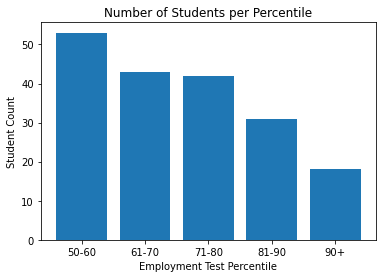

In [62]:
df_no_outliers['etestbin']=pd.cut(df_no_outliers['etest_p'],[49,60,70,80,90,110],
                                  labels=['50-60','61-70','71-80','81-90','90+'])
dfgrp=df_no_outliers.groupby(['etestbin'],as_index=False)['etest_p'].count()

plt.bar(dfgrp['etestbin'],dfgrp['etest_p'])
plt.xlabel('Employment Test Percentile')
plt.ylabel('Student Count')
plt.title('Number of Students per Percentile')


In [63]:
# Here we can see the number of students that scored in each percentile of the Employment test.
# It appears that most students placed in the 60-80th percentile.

[Text(0.5, 0, 'Degree type'),
 Text(0, 0.5, 'Salary'),
 Text(0.5, 1.0, 'Salary vs. Degree and Specialisation')]

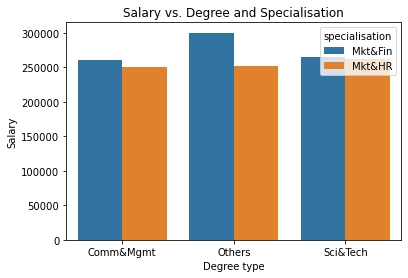

In [64]:
#Noticed that there is a single specialization labeled as Mt&HR, will rename to Mkt&HR
df_no_outliers.loc[df_no_outliers['specialisation']=='Mt&HR','specialisation']='Mkt&HR'

#Looking for specifically salaried students, as non placed students skew the data due to a salary of 0
df_salaried=df_no_outliers.loc[df_no_outliers['salary']!=0]
dfgrp=df_salaried.groupby(['degree_t','specialisation'],as_index=False)['salary'].median()

chart=sb.barplot(x='degree_t',
          y='salary',
          hue='specialisation',
          data=dfgrp)
chart.set(xlabel='Degree type',ylabel='Salary',title='Salary vs. Degree and Specialisation')

In [65]:
# Through this chart, we can see the median salaries per degree type and specialisation. Generally
# speaking, the salary seems to be within close proximity for all variables. It does appear that 
# a specialisation in Marketing and Finance results in higher salary than Marketing and HR.

[Text(0.5, 0, 'Salary'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Salary Distribution For Placed Students')]

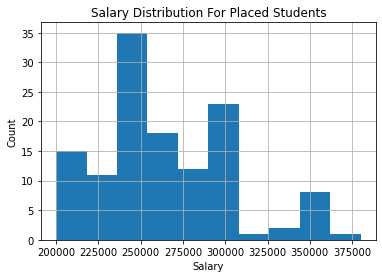

In [66]:
chart=df_salaried['salary'].hist()
chart.set(xlabel='Salary',ylabel='Count',title='Salary Distribution For Placed Students')

In [67]:
# We can see a salary distribution across places students through the histogram above.
# As we can see, the majority of places students place within the 230-310k range, a respectable salary

[Text(0.5, 0, 'Degree Type'),
 Text(0, 0.5, 'Number Of Students (By Gender)'),
 Text(0.5, 1.0, 'Gender vs. Degree Type')]

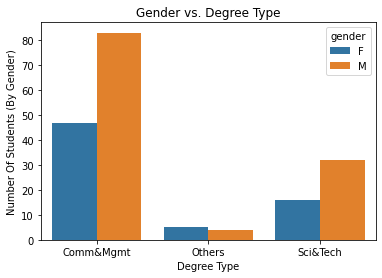

In [68]:
dfgrp=df_no_outliers

#Adding a duplicate gender role to hold to count value of each gender
dfgrp['gen']=dfgrp['gender']

dfgrp=df_no_outliers.groupby(['degree_t','gender'],as_index=False)['gen'].count() 

chart=sb.barplot(x='degree_t',
          y='gen',
          hue='gender',
          data=dfgrp)
chart.set(xlabel='Degree Type',ylabel='Number Of Students (By Gender)',title='Gender vs. Degree Type')

In [69]:
# Through this chart we can see that this recruiting firm recruits a majority of males, as such we 
# can see each degree type is predominantly male with the exception of "Others" which is likely due 
# to a small sample size in this category.

0.1298965083100484

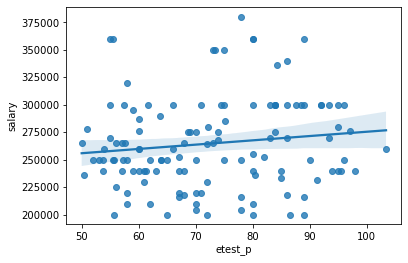

In [70]:

sb.regplot(x=df_salaried['etest_p'],y=df_salaried['salary'],fit_reg=True)

df_salaried['etest_p'].corr(df_salaried['salary'])

In [71]:
## As we can see, there seems to be no relationship between employment test percentiles and salary.
## The same applies to all other percentile based variables in the dataset hence the lack of scatter
## and line plots/regressions. We can infer that educational based scoring has no bearing on salary
## of students that are placed.

In [72]:
###
#            Question 4: Who are most likely to get placed?
###

[Text(0.5, 0, 'Job Placement'),
 Text(0, 0.5, 'Number Of Students (By Gender)'),
 Text(0.5, 1.0, 'Gender vs. Job Placement')]

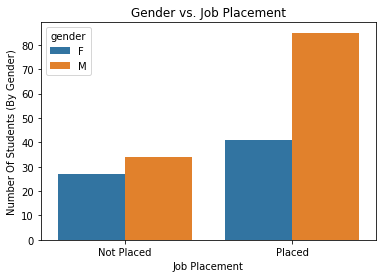

In [73]:
dfgrp=df_no_outliers.groupby(['status','gender'],as_index=False)['gen'].count()
chart=sb.barplot(x='status',
          y='gen',
          hue='gender',
          data=dfgrp)
chart.set(xlabel='Job Placement',ylabel='Number Of Students (By Gender)',title='Gender vs. Job Placement')

In [74]:
# Here we can the distribution of job placement by gender. While males have a smaller discrepency in 
# not being placed in relation to females, there is an much higher number of males being placed at jobs
# in relation to females. This begs a couple of question, firstly are these numbers proportional to the
# number of men and women, and is there a difference in levels of qualification

# To address the first question:

#create a new dataframe and group by sum of gender:
gencount=dfgrp.groupby(['gender'],as_index=False)['gen'].sum()
#rename to total per gender
gencount.rename(columns={'gen':'total'}, inplace=True)
#merge with dfgrp to have totals per each gender
merged=pd.merge(dfgrp,gencount,on='gender')
#find percentage per gender for placed and non placed students
merged['percentage']=merged['gen']/merged['total']*100

print(merged)

# Here we can see a discrepency between Females and Males in terms of job placement, despite the 
# number of students per gender, males get placed at a higher rate than females

       status gender  gen  total  percentage
0  Not Placed      F   27     68   39.705882
1      Placed      F   41     68   60.294118
2  Not Placed      M   34    119   28.571429
3      Placed      M   85    119   71.428571


[Text(0.5, 0, 'Status of Placement'),
 Text(0, 0.5, 'Number Of Students (By Gender)'),
 Text(0.5, 1.0, 'Placement Status By Gender vs. Mean Employment Test Percentile')]

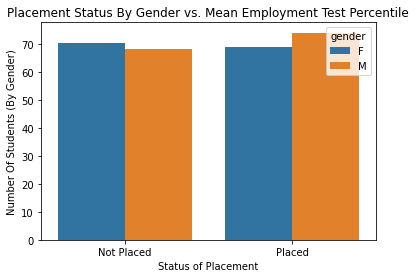

In [75]:
# For our second question, we will use employment test percentile as a proxy for job qualification, in order to see if there is
# a reason for the discrepency between male and female employment.

dfgrp=df_no_outliers.groupby(['status','gender'],as_index=False)['gender'].count()
dfgrp=df_no_outliers.groupby(['status','gender'],as_index=False)['etest_p'].mean()

chart=sb.barplot(x='status',
          y='etest_p',
          hue='gender',
          data=dfgrp)
chart.set(xlabel='Status of Placement',ylabel='Number Of Students (By Gender)',
          title='Placement Status By Gender vs. Mean Employment Test Percentile')

In [76]:
# Here we can see an interesting contradiction into the status of job placement by gender.
# We can see that of those who are placed, males have a higher employment test score percentile 
# than females, however females who are not placed have a higher average percentile score than of those who are placed.
# It is, however, important to note that males seem to require a higher employment score on average than females.

[Text(0.5, 0, 'Work Experience'),
 Text(0, 0.5, 'Student Count'),
 Text(0.5, 1.0, 'Work Experience vs. Job Placement')]

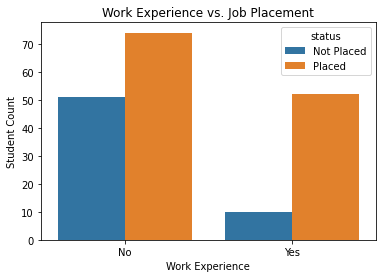

In [77]:
dfgrp=df_no_outliers
dfgrp['count']=dfgrp['status']
dfgrp=dfgrp.groupby(['workex','status'],as_index=False)['count'].count()

chart=sb.barplot(x='workex',
          y='count',
          hue='status',
          data=dfgrp)
chart.set(xlabel='Work Experience',ylabel='Student Count',
          title='Work Experience vs. Job Placement')

In [78]:
# Here we can see that there is a higher rate of placement than none placement regardless of work
# experience. However, students that do have previous work experience have a higher rate of being 
# placed than those who do not.

In [79]:
###
#            Question 5: Prepare the data for a regression analysis
###

In [80]:
#Preparing data for logistical Regression
from sklearn.linear_model import LogisticRegression

#Replacing categorical data with numeric data

# Placed=1, Not Placed=0
df_reg=df_no_outliers
df_reg=df_reg.drop(columns=['gen','count','etestbin','sl_no'])
df_reg['Status_Level']=0
df_reg.loc[df['status']=='Placed','Status_Level']=1
df_reg=df_reg.drop(['status'],axis=1)

# Male=1,Female=2
df_reg['gender_type']=1
df_reg.loc[df['gender']=='F','gender_type']=2
df_reg=df_reg.drop(['gender'],axis=1)

# Others=1,Central=2
df_reg['BOE_type']=1
df_reg.loc[df['ssc_b']=='Central','BOE_type']=2
df_reg=df_reg.drop(['ssc_b'],axis=1)

# Others=1,Central=2
df_reg['BOE_other_type']=1
df_reg.loc[df['hsc_b']=='Central','BOE_other_type']=2
df_reg=df_reg.drop(['hsc_b'],axis=1)

# Science=1,Commerce=2,Arts=3
df_reg['secondary_spec']=1
df_reg.loc[df['hsc_s']=='Commerce','secondary_spec']=2
df_reg.loc[df['hsc_s']=='Arts','secondary_spec']=3
df_reg=df_reg.drop(['hsc_s'],axis=1)

# Sci&Tech=1,Others=2,Comm&Mgmts=3
df_reg['UG_degree_type']=1
df_reg.loc[df['degree_t']=='Others','UG_degree_type']=2
df_reg.loc[df['degree_t']=='Comm&Mgmt','UG_degree_type']=3
df_reg=df_reg.drop(['degree_t'],axis=1)

# No=0,Yes=1
df_reg['WorkExp_Level']=0
df_reg.loc[df['workex']=='Yes','WorkExp_Level']=1
df_reg=df_reg.drop(['workex'],axis=1)

# Mkt&HR=1,Mkt&Fin=2
df_reg['spec_type']=1
df_reg.loc[df['specialisation']=='Mkt&Fin','spec_type']=2
df_reg=df_reg.drop(['specialisation'],axis=1)

#Setting data for regression, removing salary as it is perfectly correlated to placement
X=df_reg
X=X.drop(['Status_Level','salary'],axis=1)
y=df_reg['Status_Level']

In [81]:
###
#            Question 6: Run the regression analysis
###

In [82]:
# Running the regression

lr=LogisticRegression()
lr.fit(X,y)

lr.score(X,y)

C:\Users\Eric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8663101604278075

In [83]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Splitting data into training and test sets
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=.3, random_state=55)

#Regression score for training set
print(lr.score(X_train,y_train),'\n')

pred_train = lr.predict(X_train)

#Confusion matrix for training set
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_train,pred_train),  
    index=['actual:yes', 'actual:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx,'\n')

#Regression score for test set
print(lr.score(X_test,y_test),'\n')

pred_test=lr.predict(X_test)

#Confusion matrix for test set
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_test,pred_test),  
    index=['actual:yes', 'actual:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx)

0.8692307692307693 

            pred:yes  pred:no
actual:yes        34       11
actual:no          6       79 

0.8596491228070176 

            pred:yes  pred:no
actual:yes        12        4
actual:no          4       37
